# Load and process molecules with `rdkit`

This notebook does the following:
- Molecules downloaded in the [previous notebook](./ 1_Get_Molecular_libraries.ipynb) are processed using `rdkit`.

The output of this notebook is a the file `rdKit_db_molecules.obj`, which is a pandas data frame containing the rdkit object of each molecule.

In [1]:
import pandas as pd
import numpy as np
from glob import glob
from pathlib import Path
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')
import sys
sys.path.append('../..')
from helper_modules.analyze_molecules_with_rdkit import *

## DEKOIS Molecules

In [2]:
sdf_input_path = './datasets/DEKOIS2/sdf/'

list_sdf_files = get_files_list(sdf_input_path, actives_name='ligand')
df_DEKOIS = get_mol_dataframe(load_molecules_from_dir(list_sdf_files))
df_DEKOIS.head()

,Activity,mol_rdk,sanitized
ligand_1,active,<rdkit.Chem.rdchem.Mol object at 0x7fcc8a81aad0>,True
ligand_2,active,<rdkit.Chem.rdchem.Mol object at 0x7fcc8a81aa80>,True
ligand_3,active,<rdkit.Chem.rdchem.Mol object at 0x7fcc8a81ab20>,True
ligand_4,active,<rdkit.Chem.rdchem.Mol object at 0x7fcc8a81ab70>,True
ligand_5,active,<rdkit.Chem.rdchem.Mol object at 0x7fcc8a81abc0>,True


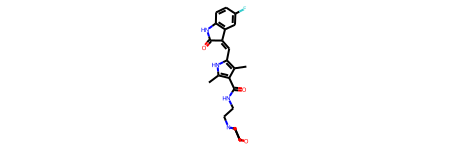

In [3]:
df_DEKOIS.loc['ligand_4', 'mol_rdk']

## DUD 2006

In [4]:
sdf_input_path = './datasets/DUD/sdf/'

list_sdf_files = get_files_list(sdf_input_path, actives_name='ligand')
df_DUD = get_mol_dataframe(load_molecules_from_dir(list_sdf_files))
df_DUD.head()

,Activity,mol_rdk,sanitized
ligand_1,active,<rdkit.Chem.rdchem.Mol object at 0x7fcc8a85e580>,True
ligand_2,active,<rdkit.Chem.rdchem.Mol object at 0x7fcc8a85e4e0>,True
ligand_3,active,<rdkit.Chem.rdchem.Mol object at 0x7fcc8a85e440>,True
ligand_4,active,<rdkit.Chem.rdchem.Mol object at 0x7fcc8a85e3a0>,True
ligand_5,active,<rdkit.Chem.rdchem.Mol object at 0x7fcc8a85e300>,True


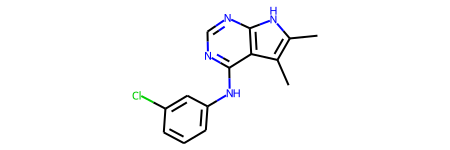

In [5]:
df_DUD.loc['ligand_4', 'mol_rdk']

## Cocrystalized molecules

In [6]:
# Path to SDF Files
sdf_input_path = './datasets/COCRYS/sdf/'
# Function to sort the molecules by their PDB id
sort_function = lambda x: x.split('/')[-1].split('_')[0]
# Get the list of files
list_sdf_files = get_files_list(sdf_input_path, 
                                actives_name='LIG', 
                                sufix='', 
                                sort_func = sort_function
                               )
# Compute a dataframe with the molecules as rdkit objects
df_pdi_lig = load_cocrys_molecules_from_dir(list_sdf_files)

# Update the dataframe
df_COCRYS = df_pdi_lig[['Lig', 'mol_rdk']]
df_COCRYS['Activity'] = 'active'
df_COCRYS['sanitized'] = [True if i != 'v3' else False for i in df_pdi_lig.validation]
df_COCRYS = df_COCRYS[['Lig', 'Activity', 'mol_rdk', 'sanitized']]
df_COCRYS = df_COCRYS.drop_duplicates('Lig').set_index('Lig')
df_COCRYS.sanitized.value_counts()
print('Shape', df_COCRYS.shape)
df_COCRYS.head()

Shape (109, 3)


,Activity,mol_rdk,sanitized
Lig,,,
AQ4,active,<rdkit.Chem.rdchem.Mol object at 0x7fcc8a863ee0>,True
FMM,active,<rdkit.Chem.rdchem.Mol object at 0x7fcc8a863e40>,True
ANP,active,<rdkit.Chem.rdchem.Mol object at 0x7fcc8a863da0>,True
112,active,<rdkit.Chem.rdchem.Mol object at 0x7fcc8a863d00>,True
IRE,active,<rdkit.Chem.rdchem.Mol object at 0x7fcc8a863b20>,True


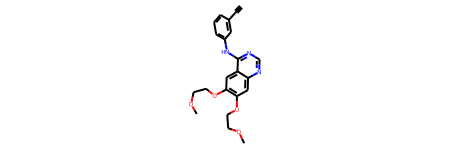

In [7]:
df_COCRYS.loc['AQ4', 'mol_rdk']

## Merge all dataframes

In [8]:
list_dfs = [df_COCRYS, df_DEKOIS, df_DUD]
list_dfs_names = ['COCRYS', 'DEKOIS2', 'DUD']

# Create the final dataframe
df_all_libraries = pd.concat(list_dfs, keys = list_dfs_names)
df_all_libraries['Activity'] = df_all_libraries['Activity']\
                                    .replace({'active': 1, 'inactive': 0})
df_all_libraries

Activity  \
       Lig                     
COCRYS AQ4                 1   
       FMM                 1   
       ANP                 1   
       112                 1   
       IRE                 1   
...                      ...   
DUD    decoy_15992         0   
       decoy_15993         0   
       decoy_15994         0   
       decoy_15995         0   
       decoy_15996         0   

                                                             mol_rdk sanitized  
       Lig                                                                      
COCRYS AQ4          <rdkit.Chem.rdchem.Mol object at 0x7fcc8a863ee0>      True  
       FMM          <rdkit.Chem.rdchem.Mol object at 0x7fcc8a863e40>      True  
       ANP          <rdkit.Chem.rdchem.Mol object at 0x7fcc8a863da0>      True  
       112          <rdkit.Chem.rdchem.Mol object at 0x7fcc8a863d00>      True  
       IRE          <rdkit.Chem.rdchem.Mol object at 0x7fcc8a863b20>      True  
...                                                              ...       ...  
DUD    decoy_15992  <rdkit.Chem.rdchem.Mol object at 0x7fcc7b2d33f0>     False  
       decoy_15993  <rdkit.Chem.rdchem.Mol object at 0x7fcc7b2d3490>     False  
       decoy_15994  <rdkit.Chem.rdchem.Mol object at 0x7fcc7b2d3530>     False  
       decoy_15995  <rdkit.Chem.rdchem.Mol object at 0x7fcc7b2d35d0>     False  
       decoy_15996  <rdkit.Chem.rdchem.Mol object at 0x7fcc7b2d3670>     False  

[17820 rows x 3 columns]

In [9]:
# Save the dataframe
output_file = './rdKit_db_molecules.obj'
if not Path(output_file).exists():
    df_all_libraries.to_pickle(output_file)